DATASET

|Height|Age|Weight|
|------|---|------|
|5|45|77|
|5.11|26|47|
|5.6|30|55|
|5.9|34|59|
|4.8|40|72|
|5.8|36|60|
|5.3|19|40|
|5.8|28|60|
|5.5|23|45|
|5.6|32|58|

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

df=pd.read_csv('train.csv')

print(df)


   Height  Age  Weight
0    5.00   45      77
1    5.11   26      47
2    5.60   30      55
3    5.90   34      59
4    4.80   40      72
5    5.80   36      60
6    5.30   19      40
7    5.80   28      60
8    5.50   23      45
9    5.60   32      58


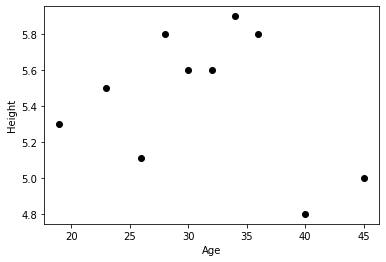

In [3]:
import matplotlib.pyplot as plt

plt.scatter(df['Age'],df['Height'],c='black')
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()

In [12]:
df.dtypes

Height    float64
Age         int64
Weight      int64
dtype: object

In [41]:
x=df.iloc[:,0:2]
print(x)

   Height  Age
0    5.00   45
1    5.11   26
2    5.60   30
3    5.90   34
4    4.80   40
5    5.80   36
6    5.30   19
7    5.80   28
8    5.50   23
9    5.60   32


In [42]:
y = df.iloc[:,2]
print(y)

0    77
1    47
2    55
3    59
4    72
5    60
6    40
7    60
8    45
9    58
Name: Weight, dtype: int64


In [69]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=0)

In [84]:
print(x_train)
print(y_train)
print(x_test)
print(y_test)

   Height  Age
9    5.60   32
1    5.11   26
6    5.30   19
7    5.80   28
3    5.90   34
0    5.00   45
5    5.80   36
9    58
1    47
6    40
7    60
3    59
0    77
5    60
Name: Weight, dtype: int64
   Height  Age
2     5.6   30
8     5.5   23
4     4.8   40
2    55
8    45
4    72
Name: Weight, dtype: int64


In [98]:
knn = KNeighborsClassifier(n_neighbors= 3,weights = 'distance' ,metric="euclidean")
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [97]:
from sklearn.metrics import accuracy_score
print("Accuracy of test set=",accuracy_score(y_test, y_pred)*100)

Accuracy of test set= 50.0


To find weight of the person whose height is 5.5 and Age is 38

In [74]:
knn.predict([[5.5,38]])

array([60])

The weight of the person is 60

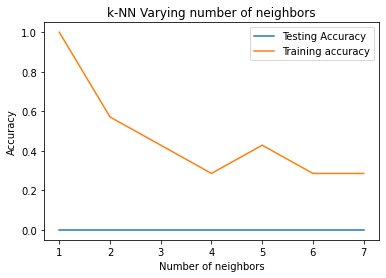

In [94]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,8)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    #Fit the model 
    knn.fit(x_train, y_train) 
    #Compute accuracy on the training set 
    train_accuracy[i] = knn.score(x_train, y_train) 
    #Compute accuracy on the test set 
    test_accuracy[i] = knn.score(x_test, y_test) 
    #Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Considering Weight as category
We get weight as 65

In [ ]:
knn.predict([[5.5,38]])

array([65])